<a href="https://colab.research.google.com/github/Nishant6397/TenserFlow-fundamentals/blob/main/Tenserflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to explore the  some of the most fundamental concepts of Tenserflow

*More Specifically we are cover:

*Intro to Tensors

*Getting information from tensors

*Manipulating the tensors

*Tensors & numpy

*Using @tf.function(a way to speed up your regular python functions)

*Using GPUs with Tensorflow or TPUs

*Exercises to try for yourself


In [ ]:
# Import Tensorflow
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.15.0


In [ ]:
# Create a tensor with tf.constant
# Creates a constant tensor from a tensor-like object.
# Link for more understanding
# https://www.tensorflow.org/api_docs/python/tf/constant
scalar = tf.constant(7)
scalar

# Constant 1-D Tensor from a python list.
b= tf.constant([1, 2, 3, 4, 5, 6])
b

# Or a numpy array
a = np.array([[1, 2, 3], [4, 5, 6]])
tf.constant(a)
a






array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
#Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
#Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
#Check the dimenstions for that
vector.ndim

1

In [ ]:
#create a matrix
matrix = tf.constant([[10,7], [10,9]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [10,  9]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
#Create a another matrix
another_matrix = tf.constant([[10.,8,],[3.,5.], [3.,7.]], dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  8.],
       [ 3.,  5.],
       [ 3.,  7.]], dtype=float16)>

In [ ]:
another_matrix.ndim

2

In [ ]:
one_more_matrix = tf.constant([[[2,3],[4,5]]])
one_more_matrix

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[2, 3],
        [4, 5]]], dtype=int32)>

In [ ]:
one_more_matrix.ndim

3

In [ ]:
#Lets create a tensor
tensor = tf.constant([[[[1,2,3], [4,4,5]], [[2,3,2],[3,4,5]],[[3,2,4], [3,4,5]]]])
tensor



<tf.Tensor: shape=(1, 3, 2, 3), dtype=int32, numpy=
array([[[[1, 2, 3],
         [4, 4, 5]],

        [[2, 3, 2],
         [3, 4, 5]],

        [[3, 2, 4],
         [3, 4, 5]]]], dtype=int32)>

In [ ]:
tensor.ndim

4

#What we've created so far:
*Scalar: a single number

*Vector: a number with direction (e.g. wind speed and direction)

*Matrix: a 2-dimensional array of numbers

*Tensor: an n-dimensional array of numbers (where n can be any number , a-0 dimensional , a 1 dimension is a vector)

### Creating Tensor with tf.variable

https://www.tensorflow.org/api_docs/python/tf/Variable

Why would we use variable over constant tensors


In variable tensors we can change the value of existing tensor with the help of assign function

In [ ]:
#Create a above tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
changeable_tensor[0].assign(7)
changeable_tensor

#but for constant we can't do this so we have to decide what we use variable or constant


<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

### Creating Random Tensors
IN the starting we initailize with random wieghts and biases in the beginning then we train our model with the help of back propagation algorithm it will tweaks our weights and biases in this manner our neural network train
so for the we want random tensor
So here is a function in Tensorflow for creating the random tensors


https://www.tensorflow.org/api_docs/python/tf/random/uniform

In [ ]:
random_1 = tf.random.Generator.from_seed(42) #set seed for reproducibility
random_1= random_1.uniform(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0.7493447 , 0.73561966],
        [0.45230794, 0.49039817],
        [0.1889317 , 0.52027524]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)

### Shuffle th order of elements
https://www.tensorflow.org/api_docs/python/tf/random/shuffle

In [ ]:
#Shuffke a tensor (shuffle the data wanted to inherit the data but does not affect the learning)
not_shuffled = tf.constant([[10,7],[3,4],[2,5]])
not_shuffled.ndim ,  not_shuffled


(2,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]], dtype=int32)>)

In [ ]:
shiffled  = tf.random.shuffle(
    not_shuffled
)
shiffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

SET Seed

It looks like if we want our shuffled tensors to be in the same order we've go to use global level random seed as well as operation level random seed:
https://www.tensorflow.org/api_docs/python/tf/random/set_seed

In [ ]:
tf.random.set_seed(42) #global level random seed
# tf.random.set_seed(
#     seed
# )
tf.random.shuffle(not_shuffled, seed=42) #operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

 # Other ways to create tensors

In [ ]:
# Create a tensors all ones
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Create a tensors of all zeroes
tf.zeros(shape= ( 3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn Numpy array into tensors

The main difference between NUmpy arrays and tenserflow is that tensors can be run on a GPU Computing

In [ ]:
#Youcan aksi tyrb Numpy arrays into tensors
import numpy as np
numpy_A = np.arange(1,25, dtype=np.int32) #create a Numpy array between 1 and 25
numpy_A

#X = tf.constant(some_matrix) #capital for matrix or tensor
#y = tf.constant(vector) non capital for vecot

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
# We can directly pass the  numpy array into the Tenserflow  toi made a tensor
A = tf.constant(numpy_A, shape= (2,3,4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

###  Getting information from Tensors
## When dealing with tensors you probably want to aware of the following attributes

Shape -> The length (number of elements) of each of the dimensions of a tensor.  -> tensor.shape

Rank  -> The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a Matrix has rank 2, a Tensor has rank n -> tensor.ndim

Axis of Dimension -> A particular dimension of a tensor  -> tensor[0], tensor[:,1].....

Size -> The total number of items in the tensor -> tf.size(tensor)


In [ ]:
# Creata  rank 4 tensor (4 dimesions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Get varipus attributes of our tensor
print("Datatype of every element: " , rank_4_tensor.dtype)
print("Number of dimensions (rank): ", rank_4_tensor.ndim)
print("Shape of tensor: ", rank_4_tensor.shape)
print("Elements along the 0 axis: ", rank_4_tensor.shape[0])
print("Elements along the last axis: ", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor: ", tf.size(rank_4_tensor).numpy())

Datatype of every element:  <dtype: 'float32'>
Number of dimensions (rank):  4
Shape of tensor:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements in our tensor:  120


### Indexing Tensors
Tensors can be indexed just like python lists


In [ ]:
some_list = [1,2,3,4]
some_list[:2]

[1, 2]

In [ ]:
#Ge the first 2 elements of each dimesnion
rank_4_tensor[:2, :2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
#Get the first  element from each dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7], [2,4]])
rank_2_tensor.shape, rank_2_tensor.ndim


(TensorShape([2, 2]), 2)

In [ ]:
#Get the last item of each row in rank _2 tensor
rank_2_tensor[: ,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Add extra dimension in rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor


<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 2],
        [ 4]]], dtype=int32)>

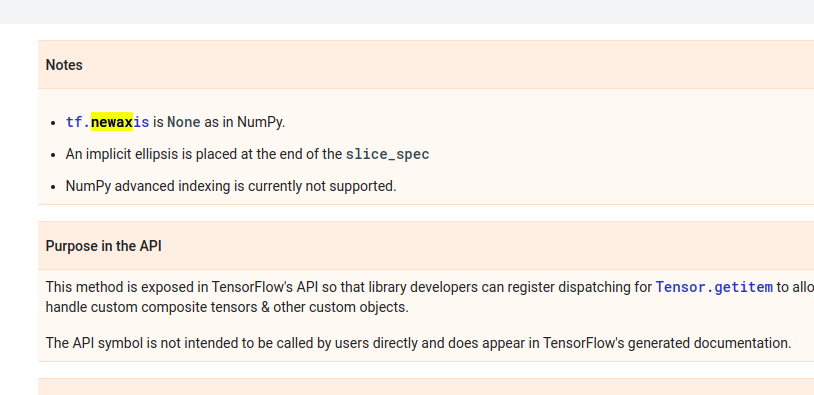

In [ ]:
# Alternative to tf.newaxis()
tf.expand_dims(rank_2_tensor, axis=1) # "-1" means expand the final axis , 1 is called expand in the middle 0 the for starting

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  7]],

       [[ 2,  4]]], dtype=int32)>

### Manipulating Tensors (tensor operations)

** Basic Operations **

+, -,*,/

In [ ]:
# You can add values to a tensor using the addition operator
#Original tensor is unchanges
tensor = tf.constant([[10,7], [3,4]])
tensor +10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:

tensor = tensor +10

In [ ]:

tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
#Multiplication also works
tensor*10


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[200, 170],
       [130, 140]], dtype=int32)>

In [ ]:
#subtraction
tensor-10


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# We can use the tenserflow built-in function too
tf.multiply(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[200, 170],
       [130, 140]], dtype=int32)>

*** Matrix Multiplication ***
There are two rules need to fulfilll if we're going to matrix multiply

The inner dimension must match

The resulting matrix has the shape of outer dimensions

In [ ]:
# Matrix multiplication in tenserflow
tensor = tf.constant([[10,7], [3,4]])

tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
tensor_1 = tf.constant([[1,2,5], [7,2,1], [3,3,3]])
tensor_2 = tf.constant([[3,5], [6,7], [1,8]])
tf.matmul(tensor_1, tensor_2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [ ]:
tensor_1 @ tensor_2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [ ]:
# multiply tensor with same shape
matrix_1 = tf.constant([[1,2],[3,4],[5,1]])
matrix_2 = tf.constant([[2,5],[6,7],[1,8]])
matrix_1 , matrix_2

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 1]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[2, 5],
        [6, 7],
        [1, 8]], dtype=int32)>)

In [ ]:
# tf.matmul(matrix_1, matrix_2)

In [ ]:
# Lets change the shape of matrix
updated_matrix = tf.reshape(matrix_2, shape=(2,3))

tf.matmul(matrix_1, updated_matrix)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[16,  7, 22],
       [34, 19, 50],
       [17, 26, 38]], dtype=int32)>

In [ ]:
# Can do the same with transpose
tf.transpose(matrix_1) , tf.reshape(matrix_1, shape=(2,3))

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 1]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 1]], dtype=int32)>)

# The Dot Product

Matrix Multiplication is also referred as the dot product

You can perform matri Multiplication using

* tf.matmul()
* tf.tensordot()

In [ ]:
#Perform the dot product on X and Y (requires X or Y to be transpose )
X = matrix_1
Y = matrix_2

X, Y ,tf.tensordot(tf.transpose(X), Y, axes=1)


(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 1]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[2, 5],
        [6, 7],
        [1, 8]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[25, 66],
        [29, 46]], dtype=int32)>)

In [ ]:
# perform matrix multiplication between X and Y ( transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[12, 20, 17],
       [26, 46, 35],
       [15, 37, 13]], dtype=int32)>

In [ ]:
# perform matrix multiplication between X and Y ( reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[16,  7, 22],
       [34, 19, 50],
       [17, 26, 38]], dtype=int32)>

In [ ]:
# Check the values of Y , transpose of Y
print("Normal Y:")
print(Y, "\n")
print("Y reshaped to (2,3):")
print(tf.reshape(Y, (2,3)), "\n")
print("Y transposed:")
print(tf.transpose(Y))
#

Normal Y:
tf.Tensor(
[[2 5]
 [6 7]
 [1 8]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3):
tf.Tensor(
[[2 5 6]
 [7 1 8]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[2 6 1]
 [5 7 8]], shape=(2, 3), dtype=int32)


# Changing the data type of tensors
